Assignment-3 Build CNN Model for Classification of Flowers

# Download Dataset

In [2]:
# the dataset of images of flowers is downloaded and uploaded into the colab files and then unzipped

In [3]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

# Image Augmentation

In [6]:
#Image Augmentation on training varaible
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [7]:
#Image Augmentation on testing variable
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
#Image Augmentation on training data

xtrain = train_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [9]:
#Image Augmentation on testing data

xtest = test_datagen.flow_from_directory('/content/flowers',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


In [10]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Create Model 

In [13]:
 # Initializing sequential model
model = Sequential()

# Add Layers

a.Convolution Layer

In [14]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

b.Max-Pooling Layer

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

c.Flatten Layer

In [16]:
model.add(Flatten())

d.Hidden Layer

In [17]:
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2

e.Output Layer

In [18]:
model.add(Dense(5,activation='softmax'))

# Add Layers

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [21]:
model = Sequential()

In [22]:
model.add(Convolution2D(32, (3,3), input_shape=(64,64,3), activation = 'relu'))

In [23]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit the Model

In [40]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/10
44/44 [==============================] - 47s 1s/step - loss: 1.6499 - accuracy: 0.3929 - val_loss: 1.2271 - val_accuracy: 0.4786
Epoch 2/10
44/44 [==============================] - 45s 1s/step - loss: 1.0959 - accuracy: 0.5622 - val_loss: 1.0450 - val_accuracy: 0.5775
Epoch 3/10
44/44 [==============================] - 45s 1s/step - loss: 1.0182 - accuracy: 0.6064 - val_loss: 1.0093 - val_accuracy: 0.6030
Epoch 4/10
44/44 [==============================] - 45s 1s/step - loss: 0.9608 - accuracy: 0.6264 - val_loss: 0.8904 - val_accuracy: 0.6599
Epoch 5/10
44/44 [==============================] - 45s 1s/step - loss: 0.8963 - accuracy: 0.6565 - val_loss: 0.8500 - val_accuracy: 0.6789
Epoch 6/10
44/44 [==============================] - 45s 1s/step - loss: 0.8545 - accuracy: 0.6743 - val_loss: 0.8376 - val_accuracy: 0.6847
Epoch 7/10
44/44 [==============================] - 45s 1s/step - loss: 0.8489 - accuracy: 0.6729 - val_loss: 0.8133 - val_accuracy: 0.6963
Epoch 8/10
44/44 [==

# Save the Model

In [41]:
model.save('CNN_Flowers.h5')

In [42]:
ls

CNN_Flowers.h5  flowers/  Flowers-Dataset.zip  sample_data/


# Test the Model

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [44]:
import numpy as np
from tensorflow.keras.models import load_model

In [45]:
from tensorflow.keras.preprocessing import image

In [46]:
model=load_model('CNN_Flowers.h5')

In [47]:
pwd

'/content'

In [48]:
img = image.load_img('/content/flowers/rose/12338444334_72fcc2fc58_m.jpg')

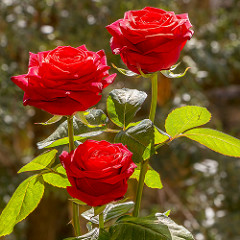

In [49]:
img

In [52]:
img = image.load_img('/content/flowers/dandelion/14003401241_543535b385.jpg',target_size=(64,64))

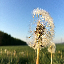

In [53]:
img

In [54]:
x=image.img_to_array(img)

In [55]:
x

array([[[137., 181., 230.],
        [137., 183., 233.],
        [138., 182., 231.],
        ...,
        [103., 157., 227.],
        [106., 158., 231.],
        [102., 155., 225.]],

       [[142., 185., 230.],
        [141., 184., 235.],
        [135., 181., 231.],
        ...,
        [102., 155., 225.],
        [111., 160., 226.],
        [107., 160., 230.]],

       [[141., 184., 229.],
        [146., 188., 238.],
        [143., 180., 233.],
        ...,
        [106., 155., 221.],
        [104., 158., 228.],
        [111., 164., 234.]],

       ...,

       [[ 12.,  29.,  11.],
        [ 84.,  86.,  46.],
        [ 63.,  72.,  41.],
        ...,
        [ 67.,  77.,  40.],
        [ 87.,  94.,  53.],
        [ 67.,  73.,  39.]],

       [[ 25.,  40.,  19.],
        [ 71.,  75.,  40.],
        [ 41.,  54.,  26.],
        ...,
        [ 37.,  45.,  21.],
        [ 56.,  63.,  29.],
        [ 51.,  64.,  34.]],

       [[ 58.,  63.,  31.],
        [ 57.,  64.,  30.],
        [ 45.,  

In [56]:
x.shape

(64, 64, 3)

In [57]:
x=np.expand_dims(x,axis=0)

In [58]:
x

array([[[[137., 181., 230.],
         [137., 183., 233.],
         [138., 182., 231.],
         ...,
         [103., 157., 227.],
         [106., 158., 231.],
         [102., 155., 225.]],

        [[142., 185., 230.],
         [141., 184., 235.],
         [135., 181., 231.],
         ...,
         [102., 155., 225.],
         [111., 160., 226.],
         [107., 160., 230.]],

        [[141., 184., 229.],
         [146., 188., 238.],
         [143., 180., 233.],
         ...,
         [106., 155., 221.],
         [104., 158., 228.],
         [111., 164., 234.]],

        ...,

        [[ 12.,  29.,  11.],
         [ 84.,  86.,  46.],
         [ 63.,  72.,  41.],
         ...,
         [ 67.,  77.,  40.],
         [ 87.,  94.,  53.],
         [ 67.,  73.,  39.]],

        [[ 25.,  40.,  19.],
         [ 71.,  75.,  40.],
         [ 41.,  54.,  26.],
         ...,
         [ 37.,  45.,  21.],
         [ 56.,  63.,  29.],
         [ 51.,  64.,  34.]],

        [[ 58.,  63.,  31.],
       

In [59]:
x.shape

(1, 64, 64, 3)

In [60]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [61]:
index=["Daisy","Dandelion","Rose","Sunflower","Tulip"]

In [62]:
index[0]

'Daisy'

In [63]:
img = image.load_img('/content/flowers/sunflower/15145607875_e87204d78c_n.jpg',target_size=(64,64))

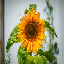

In [64]:
img

In [77]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [68]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]


'sunflower'

In [74]:
dandelion = image.load_img('/content/flowers/dandelion/13560152823_9da5e48c87_m.jpg',target_size=(64,64))
x = image.img_to_array(dandelion)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'